In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [2]:
covid = pd.read_csv(r'caso.csv', encoding = "utf-8")

In [3]:
covidRecife = covid[covid.city == 'Recife'].sort_values(by=['date'], ascending=True)
covidRecife.reset_index(inplace=True, drop=True)
covidRecife.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803


In [4]:
#first try with a for loop
# def sub_column_value(newcolumn, subcolumn, table):
#     table[newcolumn] = 0
#     for index, i in enumerate(subcolumn):
#         if index > 0:
#             value = (subcolumn[index] - subcolumn[index-1])
#             if value > 0:
#                 table[newcolumn][index] = value
#             else:
#                 table[newcolumn][index] = 0

# sub_column_value('deaths_per_day', covidRecife.deaths, covidRecife)

# using pandas diff to calculate the difference between consecutive rows
covidRecife['deaths_per_day'] = covidRecife.deaths.diff()
covidRecife.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818,10.0
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810,5.0
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807,2.0
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805,9.0
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803,14.0


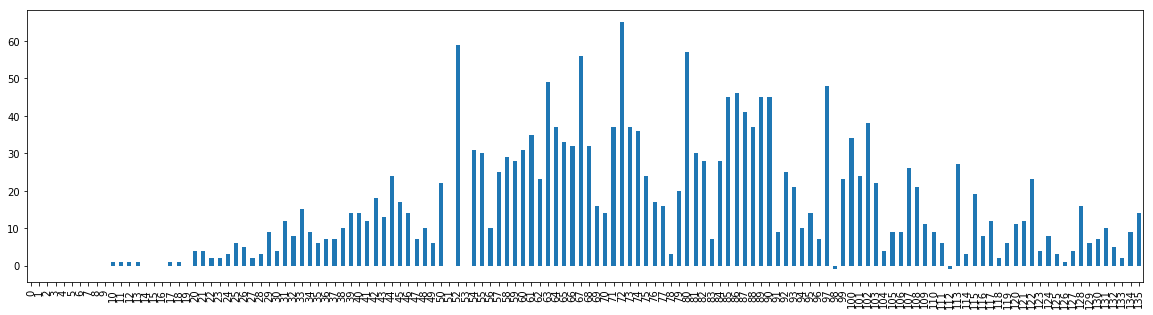

In [5]:
covidRecife['deaths_per_day'].plot(kind="bar", figsize=(20,5))

In [6]:
covidSP = covid[covid.city == 'São Paulo'].sort_values(by=['date'], ascending=True)
covidSP.reset_index(inplace=True, drop=True)
covidSP['deaths_per_day'] = covidSP.deaths.diff()
covidSP.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
143,2020-07-26,SP,São Paulo,city,179777,9222,144,False,12252023.0,3550308.0,1467.32503,0.0513,17.0
144,2020-07-27,SP,São Paulo,city,182027,9241,145,False,12252023.0,3550308.0,1485.68934,0.0508,19.0
145,2020-07-28,SP,São Paulo,city,185708,9318,146,False,12252023.0,3550308.0,1515.73336,0.0502,77.0
146,2020-07-29,SP,São Paulo,city,188827,9396,147,False,12252023.0,3550308.0,1541.19038,0.0498,78.0
147,2020-07-30,SP,São Paulo,city,193684,9470,148,True,12252023.0,3550308.0,1580.83281,0.0489,74.0


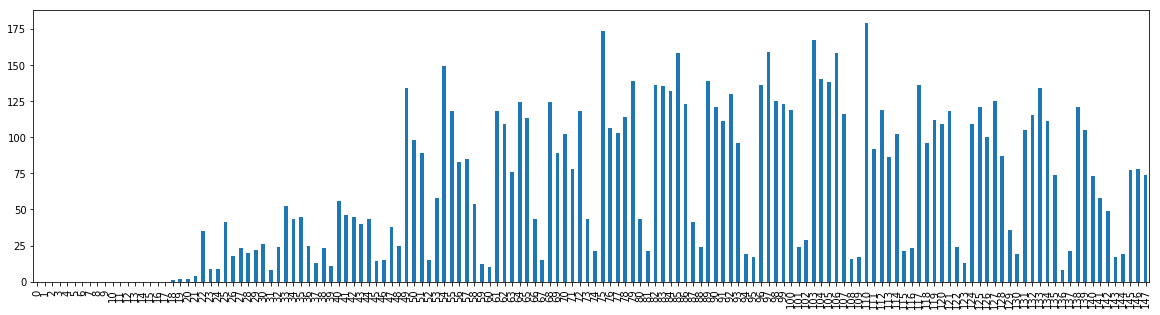

In [7]:
covidSP['deaths_per_day'].plot(kind="bar", figsize=(20,5))

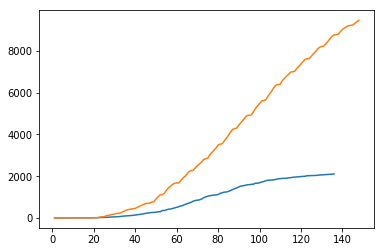

In [8]:
plt.plot(covidRecife['order_for_place'], covidRecife['deaths'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths'], label="line 2")

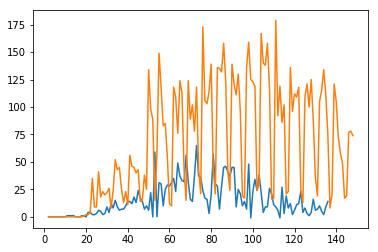

In [9]:
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day'], label="line 2")

In [10]:
# usando função
# def deaths_per_day_per_1kk(newcolumn, table):
#     population_per_1kk = table.estimated_population_2019[0] / 1000000
#     table[newcolumn] = table.deaths_per_day / population_per_1kk
# deaths_per_day_per_1kk('deaths_per_day_per_1kk_inhabitants', covidRecife)

# recurso do pandas: apply
covidRecife['deaths_per_day_per_1kk_inhabitants'] = covidRecife.apply(lambda x: x['deaths_per_day']/(x['estimated_population_2019'] / 1000000), axis=1)


In [11]:
covidSP['deaths_per_day_per_1kk_inhabitants'] = covidSP.apply(lambda x: x['deaths_per_day']/(x['estimated_population_2019'] / 1000000), axis=1)

In [12]:
covidRecife.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818,10.0,6.076342
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810,5.0,3.038171
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807,2.0,1.215268
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805,9.0,5.468708
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803,14.0,8.506879


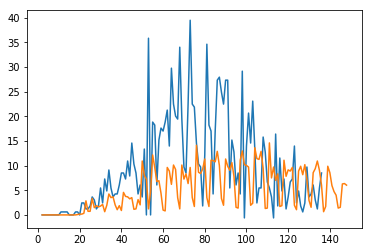

In [13]:
# linha azul => recife / linha laranja => São Paulo
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day_per_1kk_inhabitants'], label="Recife")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day_per_1kk_inhabitants'], label="São Paulo")

In [14]:
covidRecife['confirmed_per_day'] = covidRecife.confirmed.diff()
covidSP['confirmed_per_day'] = covidSP.confirmed.diff()
covidRecife['confirmed_per_day_per_1kk_inhabitants'] = covidRecife.apply(lambda x: x['confirmed_per_day']/(x['estimated_population_2019'] / 1000000), axis=1)
covidSP['confirmed_per_day_per_1kk_inhabitants'] = covidSP.apply(lambda x: x['confirmed_per_day']/(x['estimated_population_2019'] / 1000000), axis=1)

covidSP.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants,confirmed_per_day,confirmed_per_day_per_1kk_inhabitants
143,2020-07-26,SP,São Paulo,city,179777,9222,144,False,12252023.0,3550308.0,1467.32503,0.0513,17.0,1.387526,662.0,54.031893
144,2020-07-27,SP,São Paulo,city,182027,9241,145,False,12252023.0,3550308.0,1485.68934,0.0508,19.0,1.550764,2250.0,183.643142
145,2020-07-28,SP,São Paulo,city,185708,9318,146,False,12252023.0,3550308.0,1515.73336,0.0502,77.0,6.284676,3681.0,300.440180
146,2020-07-29,SP,São Paulo,city,188827,9396,147,False,12252023.0,3550308.0,1541.19038,0.0498,78.0,6.366296,3119.0,254.570204
147,2020-07-30,SP,São Paulo,city,193684,9470,148,True,12252023.0,3550308.0,1580.83281,0.0489,74.0,6.039819,4857.0,396.424329


In [15]:
covidRecife.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants,confirmed_per_day,confirmed_per_day_per_1kk_inhabitants
count,136.000000,136.000000,136.000000,136.0,136.0,136.000000,136.000000,135.000000,135.000000,135.000000,135.000000
mean,11460.963235,912.095588,68.500000,1645727.0,2611606.0,696.407317,0.070254,15.622222,9.492596,194.629630,118.263618
std,9298.130331,794.606363,39.403892,0.0,0.0,564.986193,0.022550,15.209417,9.241762,198.769714,120.779275
min,2.000000,0.000000,1.000000,1645727.0,2611606.0,0.121530,0.000000,-1.000000,-0.607634,-415.000000,-252.168191
25%,1225.250000,91.750000,34.750000,1645727.0,2611606.0,74.450378,0.064600,3.500000,2.126720,73.000000,44.357296
50%,12723.500000,819.000000,68.500000,1645727.0,2611606.0,773.123365,0.074650,10.000000,6.076342,166.000000,100.867276
75%,20192.500000,1752.500000,102.250000,1645727.0,2611606.0,1226.965345,0.084400,24.500000,14.887038,254.500000,154.642902
max,26277.000000,2109.000000,136.000000,1645727.0,2611606.0,1596.680370,0.109600,65.000000,39.496223,1061.000000,644.699880


In [16]:
covidSP.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants,confirmed_per_day,confirmed_per_day_per_1kk_inhabitants
count,148.000000,148.000000,148.000000,148.0,148.0,148.000000,148.000000,147.000000,147.000000,147.000000,147.000000
mean,60870.594595,3613.662162,74.500000,12252023.0,3550308.0,496.820766,0.057508,64.421769,5.258052,1317.571429,107.539092
std,61514.761222,3238.064725,42.868014,0.0,0.0,502.078402,0.025278,52.088692,4.251436,1275.235842,104.083696
min,1.000000,0.000000,1.000000,12252023.0,3550308.0,0.008160,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6093.750000,418.750000,37.750000,12252023.0,3550308.0,49.736688,0.053100,17.000000,1.387526,290.500000,23.710370
50%,36059.500000,2845.500000,74.500000,12252023.0,3550308.0,294.314660,0.060900,49.000000,3.999340,979.000000,79.905172
75%,110975.750000,6606.000000,111.250000,12252023.0,3550308.0,905.774910,0.076325,113.500000,9.263776,2106.500000,171.930791
max,193684.000000,9470.000000,148.000000,12252023.0,3550308.0,1580.832810,0.086500,179.000000,14.609832,6877.000000,561.295061


In [17]:
# here i gathered the informations about deaths per day from both cities
crec_dp1kk = covidRecife.deaths_per_day_per_1kk_inhabitants[0:136:1]
csp_dp1kk = covidSP.deaths_per_day_per_1kk_inhabitants[0:136:1]

In [18]:
# here i concatenate both DataFrames and change the name of the tables using keys
df_rec_sp = pd.concat([crec_dp1kk, csp_dp1kk], axis=1, keys=['deaths_per_day_per_1kk_in_Recife', 'deaths_per_day_per_1kk_in_Sao_Paulo'])

In [19]:
df_rec_sp.describe()

,deaths_per_day_per_1kk_in_Recife,deaths_per_day_per_1kk_in_Sao_Paulo
count,135.000000,135.000000
mean,9.492596,5.302223
std,9.241762,4.352573
min,-0.607634,0.000000
25%,2.126720,1.346716
50%,6.076342,3.672863
75%,14.887038,9.427015
max,39.496223,14.609832


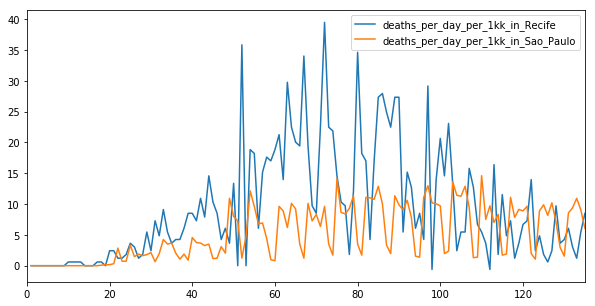

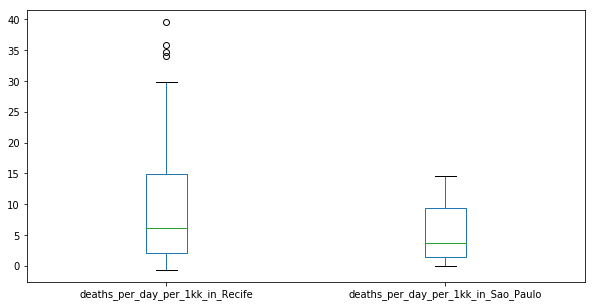

In [20]:
df_rec_sp.plot(kind='line', figsize=[10, 5])
df_rec_sp.plot(kind='box', figsize=[10, 5])

In [51]:
# check if the difference follows the gaussian
df_rec_sp['dpdp1kk_difference'] = df_rec_sp['deaths_per_day_per_1kk_in_Recife'] - df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo']

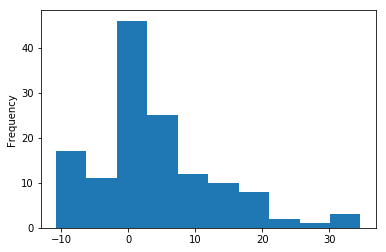

In [52]:
df_rec_sp['dpdp1kk_difference'].plot(kind='hist')

In [53]:
# Shapiro-Wilk normality test (value, p-value). Null hypothesis: the deaths in recife are not normally distributed.
stats.shapiro(df_rec_sp['dpdp1kk_difference'])

# a p-value less than the critical value indicates that the null hypothesis was rejected / shapiro => return (critical value, p-value)

(nan, 1.0)

In [55]:
# executing the t-test
stats.ttest_rel(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

Ttest_relResult(statistic=nan, pvalue=nan)

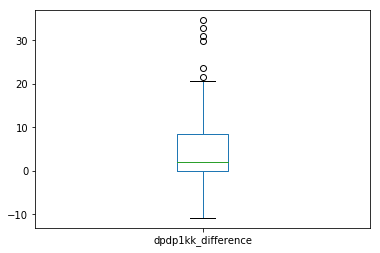

In [56]:
# checking symmetry
df_rec_sp['dpdp1kk_difference'].plot(kind='box')

In [26]:
stats.wilcoxon(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

WilcoxonResult(statistic=1913.0, pvalue=9.949580292025011e-07)

In [27]:
#ajustando tipos dos dados
covidRecife['date'] = covidRecife['date'].astype('category') 
covidRecife['state'] = covidRecife['state'].astype('category') 
covidRecife['city'] = covidRecife['city'].astype('category') 
covidRecife['place_type'] = covidRecife['place_type'].astype('category') 


In [28]:
covidRecife.dtypes

date                                     category
state                                    category
city                                     category
place_type                               category
confirmed                                   int64
deaths                                      int64
order_for_place                             int64
is_last                                      bool
estimated_population_2019                 float64
city_ibge_code                            float64
confirmed_per_100k_inhabitants            float64
death_rate                                float64
deaths_per_day                            float64
deaths_per_day_per_1kk_inhabitants        float64
confirmed_per_day                         float64
confirmed_per_day_per_1kk_inhabitants     float64
dtype: object

In [29]:
#ajustando tipos dos dados
covid['date'] = covid['date'].astype('category') 
covid['state'] = covid['state'].astype('category') 
covid['city'] = covid['city'].astype('category') 
covid['place_type'] = covid['place_type'].astype('category') 

In [30]:
covid.dtypes

date                              category
state                             category
city                              category
place_type                        category
confirmed                            int64
deaths                               int64
order_for_place                      int64
is_last                               bool
estimated_population_2019          float64
city_ibge_code                     float64
confirmed_per_100k_inhabitants     float64
death_rate                         float64
dtype: object

In [31]:
covid['city'].cat.categories

Index(['Abadia de Goiás', 'Abadia dos Dourados', 'Abadiânia', 'Abaetetuba',
       'Abaeté', 'Abaiara', 'Abaré', 'Abatiá', 'Abaíra', 'Abdon Batista',
       ...
       'Águas de São Pedro', 'Águia Branca', 'Álvares Florence',
       'Álvares Machado', 'Álvaro de Carvalho', 'Áurea', 'Ângulo',
       'Érico Cardoso', 'Óbidos', 'Óleo'],
      dtype='object', length=5196)

In [32]:
covid.shape

(441580, 12)

In [33]:
print(covid.isnull().sum())

date                                  0
state                                 0
city                               3706
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          2039
city_ibge_code                     2039
confirmed_per_100k_inhabitants    11902
death_rate                            0
dtype: int64


In [34]:
#remove instâncias com ao menos 1 coluna com dado ausente
covid1 = covid.dropna()
covid1.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
132,2020-07-30,AP,Amapá,city,398,4,93,True,9109.0,1600105.0,4369.30508,0.0101
133,2020-07-29,AP,Amapá,city,392,4,92,False,9109.0,1600105.0,4303.43616,0.0102
134,2020-07-28,AP,Amapá,city,389,4,91,False,9109.0,1600105.0,4270.50170,0.0103
135,2020-07-27,AP,Amapá,city,385,4,90,False,9109.0,1600105.0,4226.58909,0.0104
136,2020-07-26,AP,Amapá,city,383,4,89,False,9109.0,1600105.0,4204.63278,0.0104


In [35]:
len(covid1)

425978

In [36]:
#remove colunas com ao menos 90% de dados ausentes
covid2 = covid.dropna(thresh=0.9*len(covid), axis=1)

In [37]:
print(covid2.isnull().sum())

date                                  0
state                                 0
city                               3706
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          2039
city_ibge_code                     2039
confirmed_per_100k_inhabitants    11902
death_rate                            0
dtype: int64


In [38]:
print(covid2['confirmed_per_100k_inhabitants'].mean())
print(covid2['confirmed_per_100k_inhabitants'].median())

360.80733049418393
118.86864


In [39]:
covid2['confirmed_per_100k_inhabitants'].fillna(covid2['confirmed_per_100k_inhabitants'].mean(), inplace=True)

In [40]:
print(covid2.isnull().sum())

date                                 0
state                                0
city                              3706
place_type                           0
confirmed                            0
deaths                               0
order_for_place                      0
is_last                              0
estimated_population_2019         2039
city_ibge_code                    2039
confirmed_per_100k_inhabitants       0
death_rate                           0
dtype: int64


In [41]:
print(covid2['confirmed_per_100k_inhabitants'].mean())
print(covid2['confirmed_per_100k_inhabitants'].median())

360.8073304941839
127.14558000000001


In [42]:
covid2.corr(method='spearman')

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
confirmed,1.000000,0.733875,0.732222,0.073859,0.478504,-0.210078,0.749859,0.459340
deaths,0.733875,1.000000,0.574143,0.046673,0.487203,-0.208805,0.502836,0.866009
order_for_place,0.732222,0.574143,1.000000,0.114311,0.246310,-0.030683,0.645940,0.379991
is_last,0.073859,0.046673,0.114311,1.000000,-0.025403,0.006808,0.105116,0.020772
estimated_population_2019,0.478504,0.487203,0.246310,-0.025403,1.000000,-0.108483,-0.082795,0.324025
city_ibge_code,-0.210078,-0.208805,-0.030683,0.006808,-0.108483,1.000000,-0.194378,-0.130159
confirmed_per_100k_inhabitants,0.749859,0.502836,0.645940,0.105116,-0.082795,-0.194378,1.000000,0.261554
death_rate,0.459340,0.866009,0.379991,0.020772,0.324025,-0.130159,0.261554,1.000000


In [43]:
covid['confirmed_per_100k_inhabitants'].describe()

count    429678.000000
mean        360.807330
std         660.918303
min           0.002180
25%          28.946910
50%         118.868640
75%         408.120412
max       15717.926930
Name: confirmed_per_100k_inhabitants, dtype: float64

In [44]:
covidRecife.isnull().sum()

date                                     0
state                                    0
city                                     0
place_type                               0
confirmed                                0
deaths                                   0
order_for_place                          0
is_last                                  0
estimated_population_2019                0
city_ibge_code                           0
confirmed_per_100k_inhabitants           0
death_rate                               0
deaths_per_day                           1
deaths_per_day_per_1kk_inhabitants       1
confirmed_per_day                        1
confirmed_per_day_per_1kk_inhabitants    1
dtype: int64

In [45]:
covidSP.isnull().sum()

date                                     0
state                                    0
city                                     0
place_type                               0
confirmed                                0
deaths                                   0
order_for_place                          0
is_last                                  0
estimated_population_2019                0
city_ibge_code                           0
confirmed_per_100k_inhabitants           0
death_rate                               0
deaths_per_day                           1
deaths_per_day_per_1kk_inhabitants       1
confirmed_per_day                        1
confirmed_per_day_per_1kk_inhabitants    1
dtype: int64

In [46]:
covidRecife.deaths_per_day_per_1kk_inhabitants.min()

-0.6076341944927682

In [47]:
covid_norm = (covidRecife.deaths_per_day_per_1kk_inhabitants - covidRecife.deaths_per_day_per_1kk_inhabitants.min()) / (covidRecife.deaths_per_day_per_1kk_inhabitants.max() - covidRecife.deaths_per_day_per_1kk_inhabitants.min())

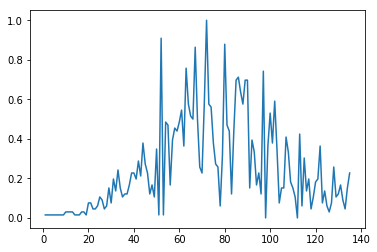

In [48]:
plt.plot(covid_norm)

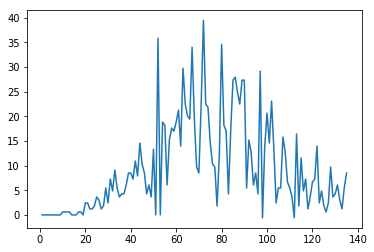

In [49]:
plt.plot(covidRecife.deaths_per_day_per_1kk_inhabitants)
